# Regularization（正则化）



## 1. 正则化的定义


In mathematics, statistics, and computer science, particularly in machine learning and inverse problems, regularization is the process of adding information in order to solve an ill-posed problem or to prevent overfitting. [link](https://en.wikipedia.org/wiki/Regularization_%28mathematics%29)

在机器学习中，在损失函数中添加正则项，目的是希望模型能够尽可能的拟合训练数据，同时希望得到的模型尽可能简单，防止过拟合，其形式大都如下，

$$\omega^*=\underset{\omega}{\arg \min} \sum_i{L(y_i, f(x_i;\omega))}+\lambda \Omega(\omega) $$
其中第一项$\sum_i{L(y_i, f(x_i;\omega))}$衡量模型预测值和真实值之间的损失，第二项$\Omega(\omega)$为正则化项，参数$\lambda$控制正则化的强度

## 2. 回顾p-范数

若向量$x \in R^n$，令$x=[x_1, x_2, \cdots, x_n]^T$,则向量$x$的p-范数为
$$||x||_p=(|x_1|^p+|x_2|^p+ \cdots +|x_n|^p)^{\frac{1}{p}}$$

当$p$取0,1,2,$\infty$时候，  
0-范数：$||x||_0$=向量$x$的非零元素的个数    
1-范数: $||x||_1=|x_1|+|x_2|+ \cdots +|x_n| $  
2-范数：$||x||_2=(|x_1|^2+|x_2|^2+ \cdots +|x_n|^2)^{1/2}$  
$\infty-$范数：$||x||_{\infty}=\max(|x_1|, |x_2|, \cdots, |x_n|)$

## 3. L1范数易求得稀疏解？L2范数易得到光滑解？

- L0和L1   
通常来说，若将L0范数（向量中非零元素的个数）加入到正则化项中，那么得到的解是稀疏的，但是这样做的话难以优化求解（NP-hard）。L1范数是L0范数的最优凸近似，并且它比L0范数要容易优化求解。L1范数和L0范数可以实现稀疏，L1因具有比L0更好的优化求解特性而被广泛应用

### 3.1 代价函数来看
假设只有一个参数$\omega$，损失函数为$L(\omega)$，加入L1和L2正则后，有
$$J_{L_1}(\omega)=L(\omega)+\lambda|\omega|$$
$$J_{L_2}(\omega)=L(\omega)+\lambda\omega^2$$

假设$L(\omega)$在$\omega=0$处的导数为  
$$\left. \frac{\partial L(\omega)}{\partial \omega} \right|_{\omega=0}=d_0$$
则加入L1和L2正则项的导数为  
L2： 
$$\left. \frac{\partial J_{L_2}(\omega)}{\partial \omega} \right|_{\omega=0}=d_0+2\lambda \omega=d_0$$

L1：
$$
 \left. \frac{\partial J_{L_1}(\omega)}{\partial \omega} \right|_{\omega=0^-}=d_0-\lambda
$$
$$
 \left. \frac{\partial J_{L_1}(\omega)}{\partial \omega} \right|_{\omega=0^+}=d_0+\lambda
$$
首先看L2项导数，在加入L2正则后，导数仍然为$d_0$，无变化。反观L1项导数，在$\omega=0$处存在两个导数，$d_0-\lambda$和$d_0+\lambda$，若$d_0-\lambda$和$d_0+\lambda$异号，那么在该处会是一个极小值点，所以L1正则项更容易产生稀疏解

### 3.2 优化角度   
$L_1=|\omega_1|+|\omega_2|+\cdots+|\omega_n|, \frac{\partial L_1}{\omega_i}=sign(\omega(i))$   
$L_2=|\omega_1^2|+|\omega_2^2|+\cdots+|\omega_n^2|, \frac{\partial L_2}{\omega_i}=2\omega_i$   
其中，$0<\eta<1$，另外上式中省略$L(\omega)$，因为两者均含此项   
以梯度下降为例，   
L1:   
$\omega_i=\omega_i-\eta \cdot sign(\omega(i))$   
从上面可以看出，当$\omega_i>0$时，权值每次更新都固定减少一个特定值，当$\omega_i<0$时，权值更新都固定增加一个特定值，所以综合来看，经过多次迭代，权值容易更新为0

L2:   
$\omega_i=\omega_i-\eta \cdot 2\omega_i=(1-2\eta)\omega_i$   
从上面可以看出$\omega_i$的减少是按比例进行减少，所以不易收敛到0，但是会更新到一个较小的值

### 3.3 图形直观理解  

假设带有L1正则化的损失函数为
$$J=J_0 + \alpha\sum_{w}{|w|}$$
因为L1正则中带有绝对值符号，所以J不是完全可微的，我们的任务就是通过优化方法通过优化$w$来求得损失函数的最小值；我们也可以理解为在原损失函数的基础上添加L1正则项，相当于是对$J_0$做了一个约束，$L=\alpha \sum_{w}{|w|}$，此时$J=J_0+L$，此时任务变为**在约束$L$下求得$J_0$的最小值的解**。   
以二维情况为例，假设只有两个权重$w_1$和$w_2$，此时$L=|w_1|+|w_2|$，假设
$$J_0(w_1, w_2) = 0.3(w_1-30)^2 + (w_2 - 30)^2$$
从下图可以看出，在固定L的等值线时，原损失函数值的等值线于L线首次相交的地方就是最优解（最终的目的是最小化损失，所以两者均想不断缩小自己的损失圈，但是必须有公共相交部分，可以理解两者首次相交的位置便是问题解），此时四个边角于L线首次接触的概率大些，而四个边角都表示$w_1=0$或者$w_2=0$，所以L1易获得稀疏解。  
类似上面L1，对于L2正则的损失函数，有
$$
\begin{equation}\begin{split} 
J
&=J_0+\alpha \sum_w{w^2} \\
&=0.3(w_1-30)^2 + (w_2-30)^2 + \alpha \cdot (w_1^2+w_2^2)\\
\end{split}\end{equation}
$$
从下图可以看出，L2正则图是个圆形，于L1相比没有棱角，这样与损失函数首次交点不容易在坐标轴上，因此L2正则不容易产生稀疏解。

Text(0, -50.0, '')

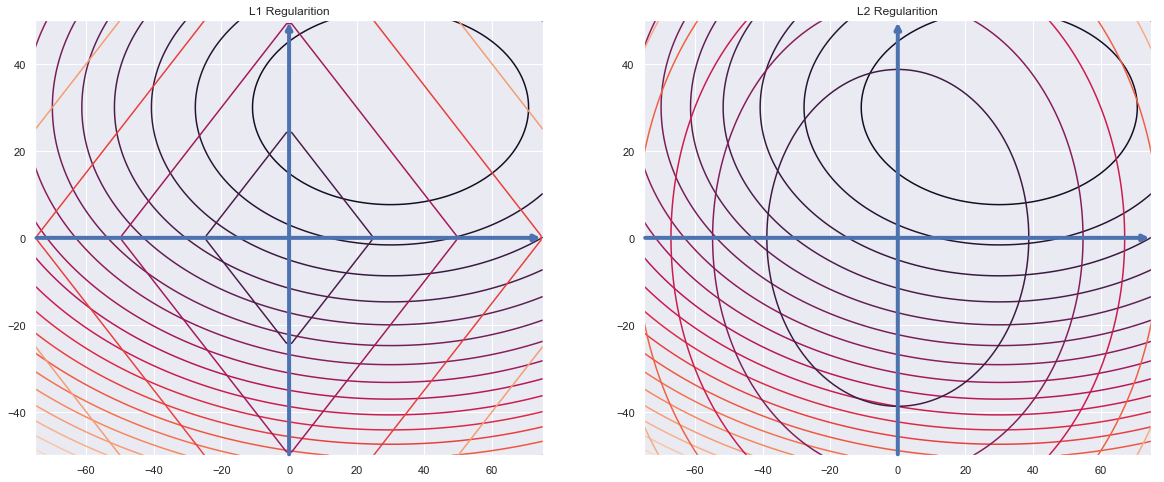

In [117]:
import matplotlib.pyplot as plt

f = lambda w1, w2: 0.3*pow((w1-30), 2)+1*pow((w2-30), 2)
l1 = lambda w1, w2: abs(w1) + abs(w2)
l2 = lambda w1, w2: pow(w1, 2) + pow(w2, 2)

x=np.linspace(-75, 75, 100)
y=np.linspace(-50, 50, 100)
X,Y=np.meshgrid(x,y)

fig, axs = plt.subplots(1, 2, figsize=(20, 8))

CS = axs[0].contour(X, Y, f(X, Y), 20)

CS1 = axs[0].contour(X, Y, l1(X, Y), 5)
# ax.clabel(CS, inline=2, fontsize=8)
axs[0].set_title('L1 Regularition')

axs[0].annotate('', xy=(x[-1],0), xytext=(x[0],0), va='center',
            multialignment='right',
            arrowprops={'arrowstyle': '-|>', 'lw': 4, 'ec': 'b', 'shrinkA': 1})

axs[0].annotate('', xy=(0, y[-1]), xytext=(0, y[0]), va='center',
            multialignment='right',
            arrowprops={'arrowstyle': '-|>', 'lw': 4, 'ec': 'b', 'shrinkA': 1})


CS = axs[1].contour(X, Y, f(X, Y), 20)

CS1 = axs[1].contour(X, Y, l2(X, Y), 5)
# ax.clabel(CS, inline=2, fontsize=8)
axs[1].set_title('L2 Regularition')

axs[1].annotate('', xy=(x[-1],0), xytext=(x[0],0), va='center',
            multialignment='right',
            arrowprops={'arrowstyle': '-|>', 'lw': 4, 'ec': 'b', 'shrinkA': 1})

axs[1].annotate('', xy=(0, y[-1]), xytext=(0, y[0]), va='center',
            multialignment='right',
            arrowprops={'arrowstyle': '-|>', 'lw': 4, 'ec': 'b', 'shrinkA': 1})

## 4. L1/L2参数分布 

其中L1假设参数服从**拉普拉斯分布**，L2假设参数服从**高斯分布**

- L1-Laplace    
概率分布 
$$
\begin{equation}\begin{split} 
f(x|\mu, b)
&= \frac{1}{2b}e^{\left(-\frac{|x-\mu|}{b}\right)}  \\
&= \frac{1}{2b} 
\begin{cases}
e^{\left(-\frac{\mu-x}{b}\right)}, &if\ x \lt \mu \\
e^{\left(-\frac{x-\mu}{b}\right)}, &if\ x \ge \mu
\end{cases}
\end{split}\end{equation}
$$
其中，$\mu$是数学期望，$b>0$是振幅，如果$\mu=0$，那么正半部分是尺度为1/2的指数分布。

- L2-Gaussian   
概率分布
$$
f(x)=\frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{(x-\mu)^2}{2\sigma_2}}
$$
其中，$\mu$是数学期望，$\sigma$决定了分布的幅度，当$\mu=0, \sigma=1$时，此时即为标准正态分布

这篇博文[贝叶斯角度看L1，L2正则化](https://blog.csdn.net/haolexiao/article/details/70243292)着重讲述了贝叶斯学派解决问题的方式，一步步带入到正则化的分布上，后面的推导不是很完整；相反这篇博文[L1、L2正则化知识详解](https://www.jianshu.com/p/c9bb6f89cfcc)着重讲解了通过拉普拉斯分布和高斯分布推导的过程（这篇文章的推导必须得看一看），非常详细。 


## 5. 总结 
- L1 
它的主要特性是能够产生稀疏解，某种程度上使得增加模型的”解释性“

- L2 
它的主要特性是偏向于求得较小的解，通过限制权重的大小实现了对模型空间的限制，从而一定程度可以避免过拟合

## 6. 参考资源

[1]. [
Wiki-Regularization (mathematics)](https://en.wikipedia.org/wiki/Regularization_%28mathematics%29)     
[2]. [CSDN-L0、L1与L2范数](https://blog.csdn.net/zouxy09/article/details/24971995)      
[3]. [CSDN-为什么L1稀疏，L2平滑？](https://www.cnblogs.com/Rvin/p/10076258.html)     
[4]. [CSDN-为什么L1稀疏L2平滑](https://blog.csdn.net/li8zi8fa/article/details/77649973)   
[5]. [机器学习中正则化项L1和L2的直观理解](https://blog.csdn.net/jinping_shi/article/details/52433975)